## Plotting daily trip counts

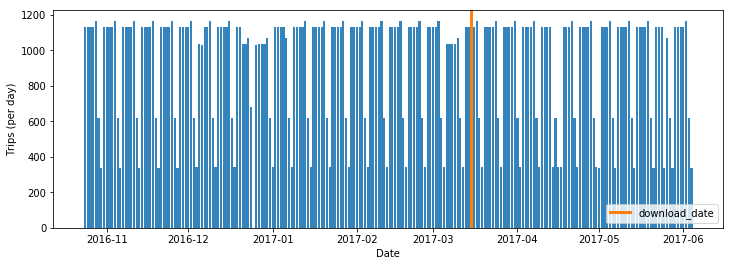

In [49]:
import sys
sys.path.append("../")  # To be able to import the current version of gtfspy
import functools
import os

from matplotlib import pyplot as plt
from gtfspy.gtfs import GTFS
from gtfspy.networks import temporal_network
import numpy as np

from example_import import load_or_import_example_gtfs

G = load_or_import_example_gtfs()

daily_trip_counts = G.get_trip_counts_per_day()
f, ax = plt.subplots(figsize=(12,4))
datetimes = [date.to_pydatetime() for date in daily_trip_counts['date']]
trip_counts = daily_trip_counts['trip_counts']

ax.bar(datetimes, trip_counts, color="C0", alpha=0.9)
ax.axvline(G.meta['download_date'], color="C1", label="download_date", lw=3)
ax.set_xlabel('Date')
ax.set_ylabel('Trips (per day)')
ax.legend(loc="lower right")
plt.show()


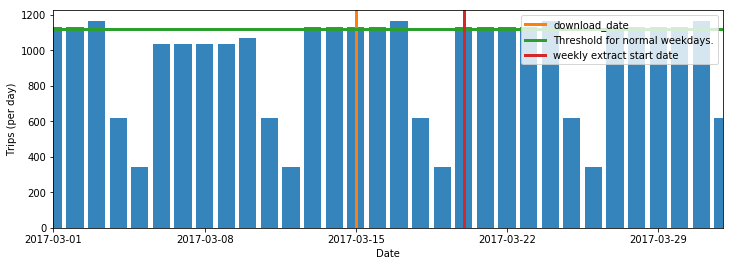

In [50]:
threshold = 0.96
ax.axhline(trip_counts.max() * threshold, label="Threshold for normal weekdays.", color="C2", lw=3)
ax.axvline(G.get_weekly_extract_start_date(weekdays_at_least_of_max=threshold), label="weekly extract start date", color="C3", lw=3)
ax.set_xlim(["2017-03", "2017-04"])
ax.legend()
f # (This line is necessary just for plotting the figure again)


## Elementary PT events for one week

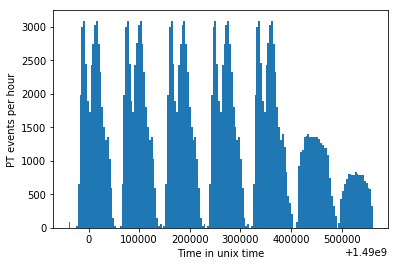

In [51]:
f_events, ax_events = plt.subplots()

start_time_ut = G.get_day_start_ut("2017-03-20")
end_time_ut = G.get_day_start_ut("2017-03-27")
events_df = temporal_network(G, start_time_ut=start_time_ut, end_time_ut=end_time_ut)

ax_events.hist(events_df['dep_time_ut'], bins=np.arange(start_time_ut, end_time_ut+1, 3600))
ax_events.set_ylabel("PT events per hour")
ax_events.set_xlabel("Time in unix time")

plt.show()